In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
#Importing ans loading data from MNIST database
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [3]:
#Pixel values lie between 0 and 255, scale to between 0 and 1
train_images=train_images/255.0
test_images=test_images/255.0

In [19]:
#A model with 3 layers - 5 hidden layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 11s 176us/sample - loss: 0.3235 - acc: 0.9033
Epoch 2/20
60000/60000 [==============================] - 10s 166us/sample - loss: 0.1533 - acc: 0.9582
Epoch 3/20
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1205 - acc: 0.9689
Epoch 4/20
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1000 - acc: 0.9742
Epoch 5/20
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0841 - acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0752 - acc: 0.9808
Epoch 7/20
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0683 - acc: 0.9823
Epoch 8/20
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0569 - acc: 0.9852
Epoch 9/20
60000/60000 [==============================] - 11s 185us/sample - loss: 0.0583 - acc: 0.9851
Epoch 10/20
60000/60000 [==============================] - 11s 1

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.1112 - acc: 0.9808
Test accuracy: 0.9808


In [14]:
predictions = model.predict(test_images)

In [21]:
print('Prediction:', np.argmax(predictions[0]))
print('Actual value:',test_labels[0])

Prediction: 7
Actual value: 7


In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

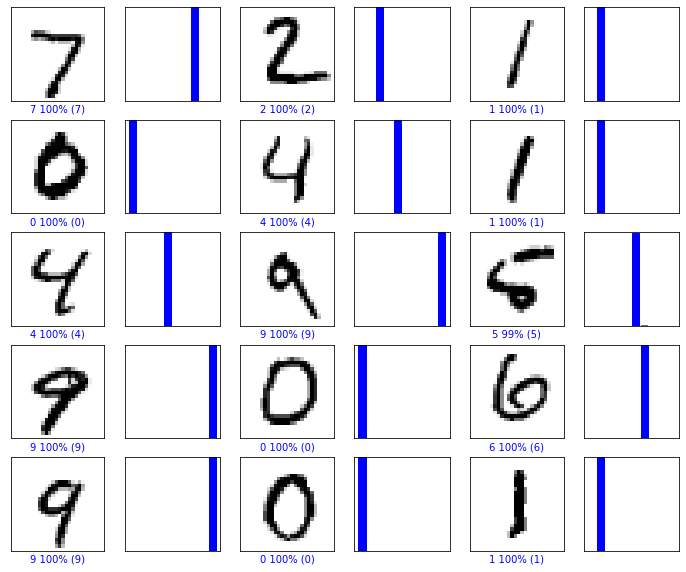

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()